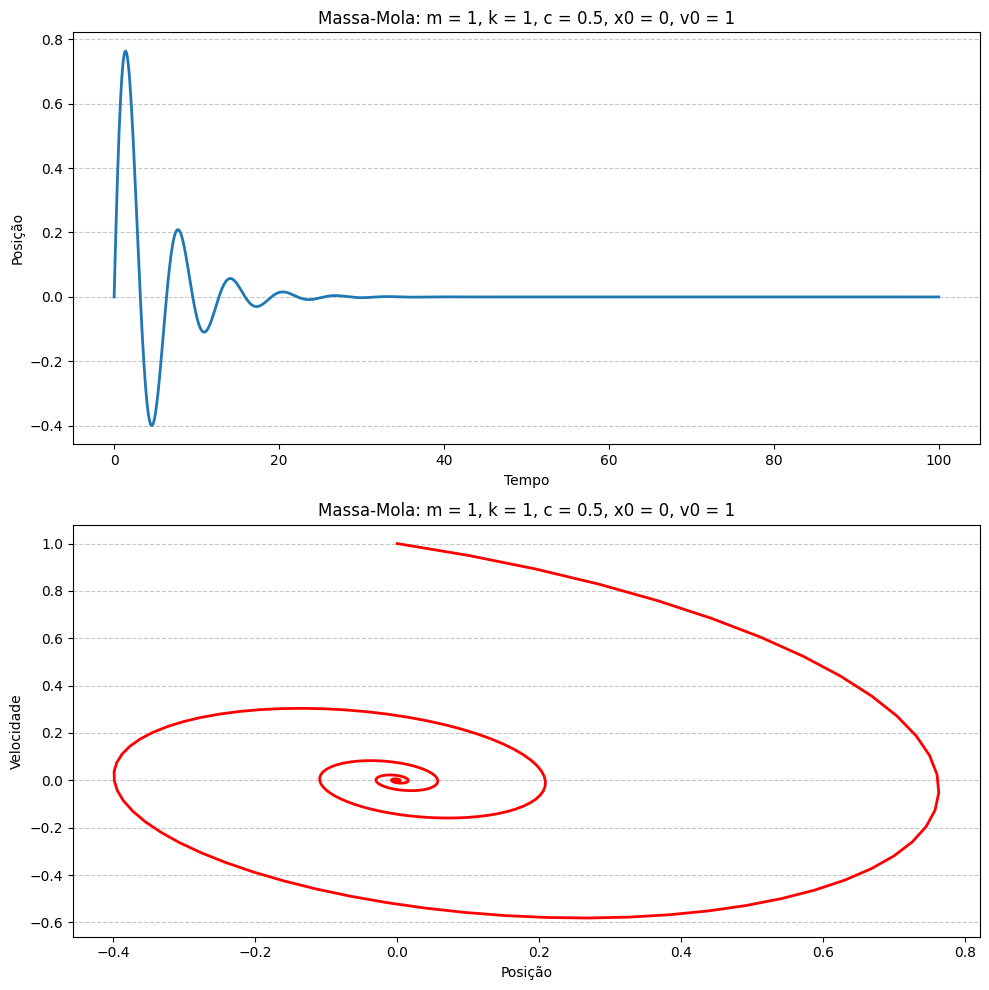

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# modelo massa-mola
# x' = v
# v' = -(1/m)(k*x + c*v)

# condições iniciais
v0 = 1
x0 = 0

# parâmetros
m = 1
k = 1
c = 0.5

# tempo
n = 1000
t_final = 100
t_inicial = 0
h = (t_final - t_inicial) / n
t = np.linspace(t_inicial, t_final, n)

def f(x_n, v_n):
    x_n1 = x_n + h * v_n
    v_n1 = v_n + h * (-(1/m)*(k*x_n + c*v_n))
    return x_n1, v_n1

x = np.zeros(n)
v = np.zeros(n)

x[0] = x0
v[0] = v0

for i in range(n-1):
    x[i+1], v[i+1] = f(x[i], v[i])

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].set_title(f"Massa-Mola: m = {m}, k = {k}, c = {c}, x0 = {x0}, v0 = {v0}")
ax[0].set_xlabel("Tempo")
ax[0].set_ylabel("Posição")
ax[0].plot(t, x, linewidth=2)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

ax[1].set_title(f"Massa-Mola: m = {m}, k = {k}, c = {c}, x0 = {x0}, v0 = {v0}")
ax[1].set_xlabel("Posição")
ax[1].set_ylabel("Velocidade")
ax[1].plot(x, v, linewidth=2, color='red')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()